In [5]:
import numpy as np
from autograd import numpy as anp
import  matplotlib.pyplot as plt
from maxent import MaxEnt
import densities as d

In [6]:
# #assume mean=0, var=1
# def f_SkewKurt(x):
#     return np.array([x,x**2,x**3,x**4])

# def b_SkewKurt(skew,kurt):
#     return np.array([0, 1, skew, kurt])


In [7]:
skew = 0
kurt = 3


u = 20
l = -20
n = 60

The resulting parameters:
  Lambda_1 = 0.000
  Lambda_2 = -0.500
  Lambda_3 = -0.000
  Lambda_4 = 0.000


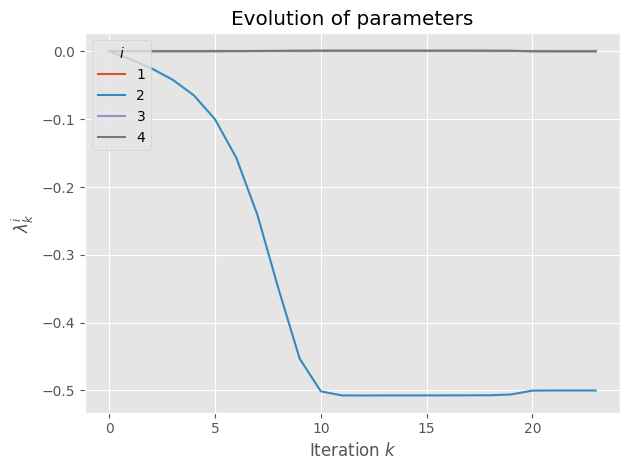

Estimate of absolute integration error of norm. const.: 2.172e-09


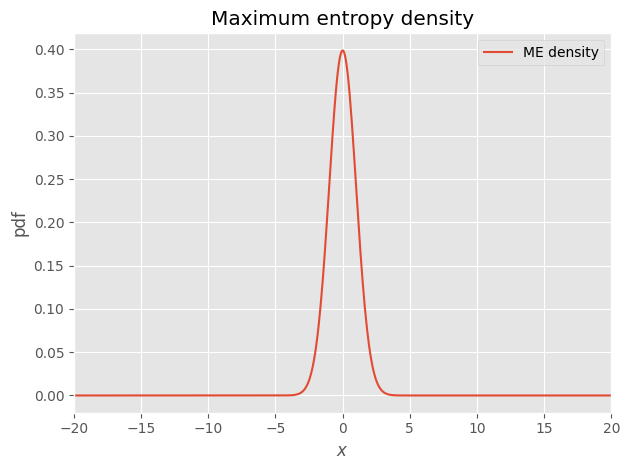

In [8]:
ob_skewkurt = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=d.b_constraint_skewkurt(skew,kurt),
                     f_vector=d.f_constraint_skewkurt)
ob_skewkurt._algorithm()
ob_skewkurt._visualize_algorithm()
ob_skewkurt._visualize_solution()

Normal distr, as should be.

The resulting parameters:
  Lambda_1 = -2.164
  Lambda_2 = 0.756
  Lambda_3 = 1.051
  Lambda_4 = -0.433


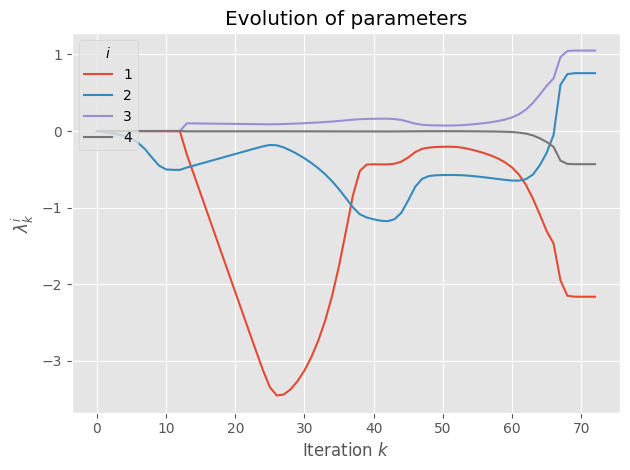

Estimate of absolute integration error of norm. const.: 5.224e-09


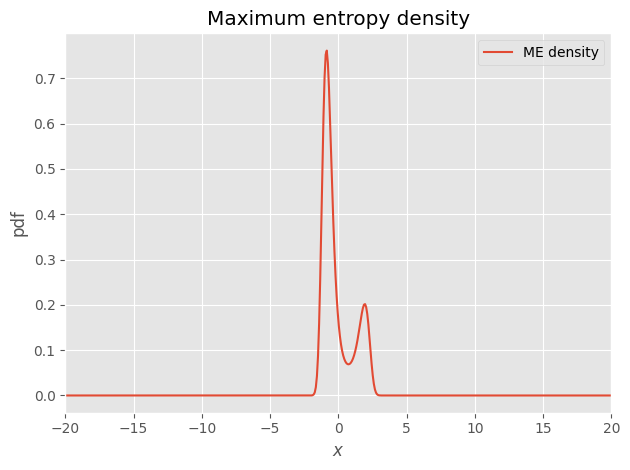

In [10]:
ob_skewkurt = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=d.b_constraint_skewkurt(1,3),
                     f_vector=d.f_constraint_skewkurt)
ob_skewkurt._algorithm()
ob_skewkurt._visualize_algorithm()
ob_skewkurt._visualize_solution()

The resulting parameters:
  Lambda_1 = -2.318
  Lambda_2 = 1.120
  Lambda_3 = 1.675
  Lambda_4 = -0.852


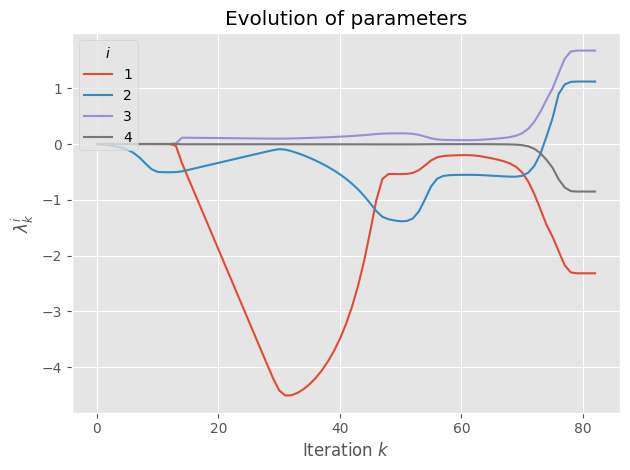

Estimate of absolute integration error of norm. const.: 3.536e-08


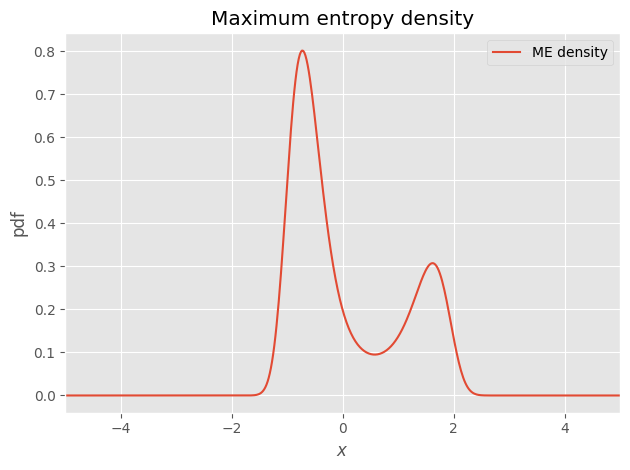

In [15]:
ob_skewkurt = MaxEnt(support=(l,u),
                     n_quadrature=100,
                     b_constraints=d.b_constraint_skewkurt(0.7, 2),
                     f_vector=d.f_constraint_skewkurt)
ob_skewkurt._algorithm()
ob_skewkurt._visualize_algorithm()
ob_skewkurt._visualize_solution(xlim=(-5,5))

The resulting parameters:
  Lambda_1 = -2.339
  Lambda_2 = 1.434
  Lambda_3 = 1.636
  Lambda_4 = -0.916


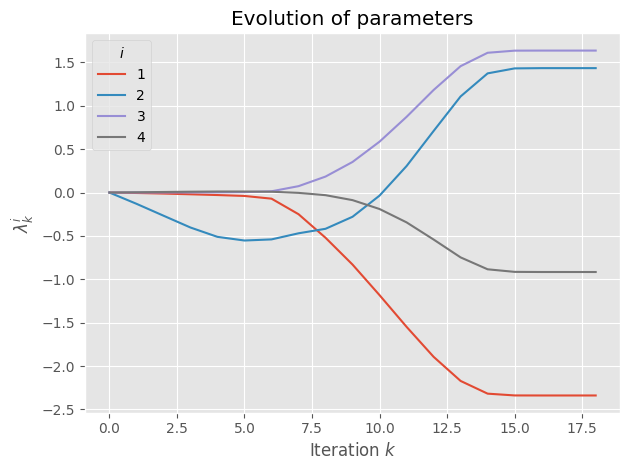

Estimate of absolute integration error of norm. const.: 3.896e-12


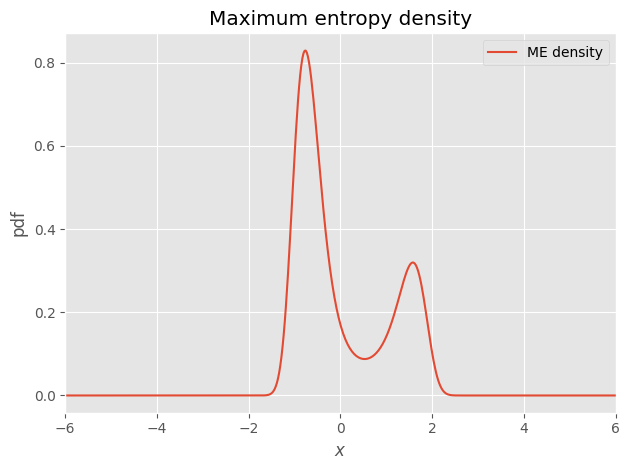

In [16]:

u = 6
l = -u
n = 40
skew = 0.7
kurt = 2

ob_skewkurt = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=d.b_constraint_skewkurt(skew,kurt),
                     f_vector=d.f_constraint_skewkurt)
ob_skewkurt._algorithm()
ob_skewkurt._visualize_algorithm()
ob_skewkurt._visualize_solution()

In [21]:
u = 6
l = -u
n = 100

skews = np.arange(0, 15, 0.5)
kurts = np.arange(0,  6, 0.25)

Ss, Ks = np.meshgrid(skews,kurts)

convergence_indicator_mat = np.zeros((len(skews),len(kurts)))

for i, skew in enumerate(skews):
    for j, kurt in enumerate(kurts):
        ob_skewkurt = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=d.b_constraint_skewkurt(skew,kurt),
                     f_vector=d.f_constraint_skewkurt)
        ob_skewkurt._algorithm(100, warning=False)
        if(ob_skewkurt._converges):
            convergence_indicator_mat[i][j] = 1
        else:
            convergence_indicator_mat[i][j] = 0


In [18]:
def convergence_plot(X, Y, Z, xlab="Parameter 1", ylab="Parameter 2", title="Convergence indicator", save_as=None):
    fig, ax = plt.subplots() 
    
    ax.set_title(title) 
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_xlim((0,4))

    cset1 = ax.contourf(X,Y,Z,levels=1)
    fig.colorbar(cset1, ax=ax)

    if(save_as is not None):
        plt.savefig(save_as) 
    plt.show() 

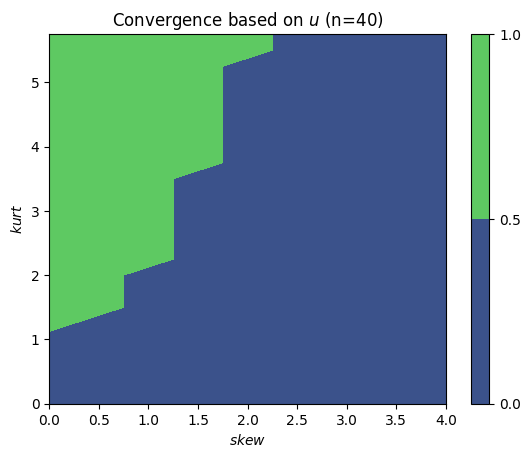

In [20]:
convergence_plot(skews,kurts,convergence_indicator_mat.T,xlab="$skew$",ylab="$kurt$",title=f"Convergence based on $u$ (n={n})",save_as="conv_plot_a_u.pdf")

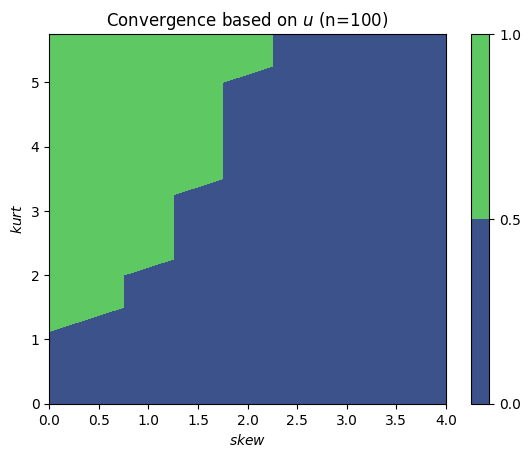

In [22]:
convergence_plot(skews,kurts,convergence_indicator_mat.T,xlab="$skew$",ylab="$kurt$",title=f"Convergence based on $u$ (n={n})",save_as="conv_plot_a_u.pdf")